## Jobs - drop stopwords 
##### https://stackoverflow.com/questions/5511708/adding-words-to-nltk-stoplist

In [1693]:
# import sys to get more detailed Python exception info
import sys
import re

import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
extra_stopwords = ['jooble','engineer','invacancy','...','uk']
stopwords.extend(extra_stopwords)

from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer


# Import PIL for wine bottle
from PIL import Image

# import Wordcloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /home/rag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1694]:
# import the connect library for psycopg2
import psycopg2

# import the error handling libraries for psycopg2
from psycopg2 import OperationalError, errorcodes, errors
import psycopg2.extras as extras
import pandas as pd
import numpy as np

In [1695]:
# Note: change database, username & password as per your own values
conn_params_dic = {
    "host"      : "192.168.1.9",
    "database"  : "jobs",
    "user"      : "user3",
    "password"  : "password3"
}

In [1696]:
def connect(conn_params_dic):
    conn = None
    try:
        print('Connecting to the PostgreSQL...........')
        conn = psycopg2.connect(**conn_params_dic)
        print("Connected successfully..................")
        
    except OperationalError as err:
        # passing exception to function
        show_psycopg2_exception(err)        
        # set the connection to 'None' in case of error
        conn = None
    return conn

conn = connect(conn_params_dic)

Connecting to the PostgreSQL...........
Connected successfully..................


In [1697]:
# Define postgresql_to_dataframe function to load data into a pandas # dataframe
def postgresql_to_dataframe(conn, sql, col_names):
    cursor = conn.cursor()
    try:
        cursor.execute(sql)
    except (Exception, psycopg2.DatabaseError) as err:
        # passing exception to function
        show_psycopg2_exception(err)      
    
    # Naturally we get a list of tupples
    tuples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tuples, columns=col_names)
    return df

0                 jooble - software engineer (crawling/reverse e...
1                 jooble - senior software engineer, automations...
2                 jooble - product analystfindlog invacancy 4 fr...
3                 jooble - principal software engineer - python,...
4                 jooble - senior data scientist, healthier live...
                                        ...                        
87                jooble - field service engineer northern irela...
88                jooble - principal software development engine...
89                jooble - project assistant engineerfindlog inv...
90                jooble - project engineerfindlog invacancy 2 f...
tokenized_text    0     [jooble, -, software, engineer, (, crawl...
Name: description, Length: 92, dtype: object

In [1698]:
sql = '''select url, description from listings'''
col_names = ['url','description']

df = postgresql_to_dataframe(conn, sql, col_names)

df = df['description'].str.lower()
jd

0     jooble - software engineer (crawling/reverse e...
1     jooble - senior software engineer, automations...
2     jooble - product analystfindlog invacancy 4 fr...
3     jooble - principal software engineer - python,...
4     jooble - senior data scientist, healthier live...
                            ...                        
86    jooble - lead devops engineerfindlog invacancy...
87    jooble - field service engineer northern irela...
88    jooble - principal software development engine...
89    jooble - project assistant engineerfindlog inv...
90    jooble - project engineerfindlog invacancy 2 f...
Name: description, Length: 91, dtype: object

In [1699]:
# tokenize a list
#txt = jd[['url','description']]
jd.value_counts()

redirecting...                                                                                                                                                                                                                                                                                                                                                                                                         9
jooble - senior software engineer, automationsfindlog invacancy 5 from 5product analystfull-timetheup.coremoteremote job product analyst  you will wor                                                                                                                                                                                                                                                                 2
jooble - remote tech writer (gmt-7 to gmt+1)findlog invacancy 3 from 3senior/lead engineer (typescript/node)$8 per hourfull-timeremoteremote job hi! my name is chris, i’m the ceo of 

In [1700]:
df['tokenized_text'] = jd.apply(word_tokenize) 
tokenz = df['tokenized_text']

In [1701]:
ls = []
tokenz
for i in tokenz:
    d = [x for x in i if x not in stopwords]
    d = ' '.join(d)
    ls.append(d)
ls = ''.join(ls)
ls = [ls]

In [1702]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(ls)

print(X.toarray())
print(vectorizer.get_feature_names())


[[11  1  9  3  4  1  1  1  1  1  1  1  3  1  4  5  1  3  3  2  1  2  1  1
   1  1  2  2  2  2  2  1  1  2  1  2  1  1  2  1  1  2  2  1  4  1  2  3
   3  2  1  1  1  1  1  1  1  1  3  3  1  1  4  4  4  5  3  5  6  1  5  2
   4  3  2  2  4  1  1  1  1  1  1  1  1  5  1  7  9  1  1  1  1  1  1  1
   2  5  3  3  6  1  3  4  4  4  2  2  1  2  1 10  1  2  1  1  1  1  1  1
   5  1  1  2 12 12  1  4  7  1 10  2  3  1  2  3  3  3  4  3  1  4  2  1
   3  4  1  1  1  1  2  1  3  2  2  1  2  4  3  1  2  2  1  2  3  1  1  1
   1  7  2  1  1  1  7  5 10  2  1  1  3  1  1  4  2  1  1  3  1  4  9  9
  18  1 10  1  3  2  5  3  1  1 29  1  3  1  1  3  5  4  5  3  1  1  1  4
   1  2  1  1  4  1  1  3  2  1  3 10  2  5  4 28  6  4  3  8  1  1  7  3
   1  1  1  3  1  4  1  1  2  1  2  4  2  1  1  1  2  1  5  3  3  9 19 11
  17  1  1  2  2  5  6  2  3  3  1  1  9  3  5  1  1  2 14  2  1  2  2  1
   3  5  3  2  1  3  2  6  3  1  3 14  1  4  1  1  1  7  2  2  1  9  3  2
  14  3  1  1  1  4  1  4  5  2  2  1 

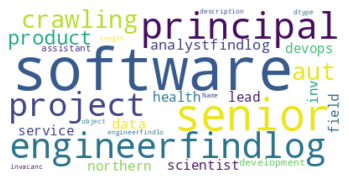

In [1703]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(tokenz))

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()